<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Import Libraries:</strong> 
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The necessary libraries have been successfully imported, including pandas, numpy, seaborn, matplotlib, and scikit-learn. These libraries will be used for data manipulation, visualization, and machine learning tasks.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Load Data:</strong> 
</div>

In [2]:
data = pd.read_csv("data.csv")  # Read File from Directory
df = data.copy()  # Create a copy of the data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The data has been successfully loaded from the CSV file into a pandas DataFrame. The data contains 381109 entries across 12 columns, with no missing values.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Data Overview:</strong> 
</div>

In [3]:
print("Data Shape:\n", df.shape,"\n")  # Show Total No. of Columns and Rows
print("Data Info:\n", df.info(),"\n")  # Show Data Overview like dtype, Null, Columns, etc.
print("Data Description:\n", df.describe(),"\n")  # Show all Statistical Calculation
print("Null Values:\n", df.isnull().sum())  # Show Count of Null value in particular Columns

Data Shape:
 (381109, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
Data Info:
 None 

Data Description:
                   id            

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The data overview has been successfully generated, providing insights into the data's shape, info, and description. The data contains a mix of numerical and categorical variables, with some variables showing a high correlation with the response variable.</span>
</div>

In [4]:
Duplicate_Rows = df[df.duplicated()]   # Show Duplicates Rows from Data...
print("Duplicate Rows:")
print(Duplicate_Rows)                  # Here duplicates are helpful for data pattern so don't remove it.

Duplicate Rows:
Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">No duplicate rows were found in the data, indicating that the data is unique and free from duplicates.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Data Visualization:</strong> 
</div>

In [5]:
# Create List of Important Numerical Features for Visualization
numerical_features = ['Age', 'Annual_Premium', 'Vintage']

=> Histogram:


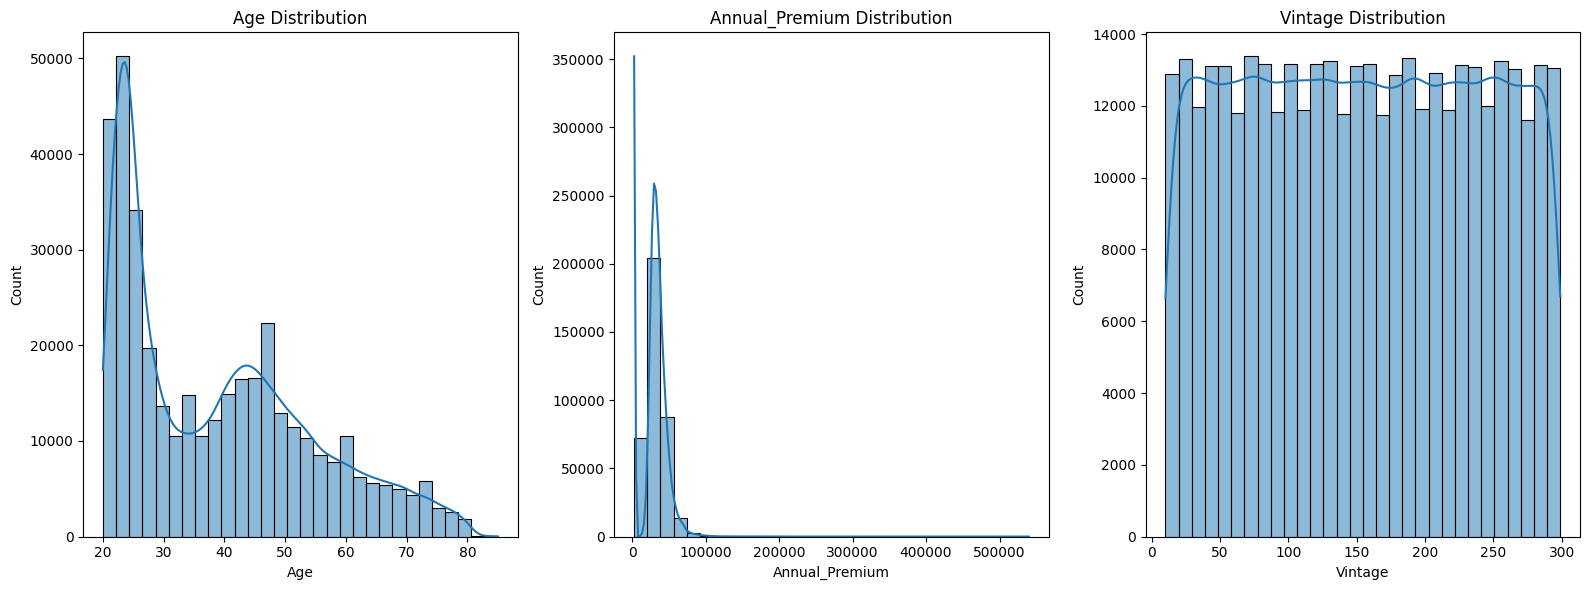

In [6]:
# Print Histogram for Visualization the Distribution of Numerical Features

print("=> Histogram:")
fig, axs = plt.subplots(1, len(numerical_features), figsize=(16, 6))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.savefig('Histograms.png', bbox_inches='tight')
plt.show()

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 0.9em;">Visual Summary:</strong> 
  <span style="color: #000000; font-size: 0.9em;">The histograms show the distribution of numerical features, highlighting the spread and central tendency of Age, Annual Premium, and Vintage.</span>
</div>

=> Pie Chart for Gender:


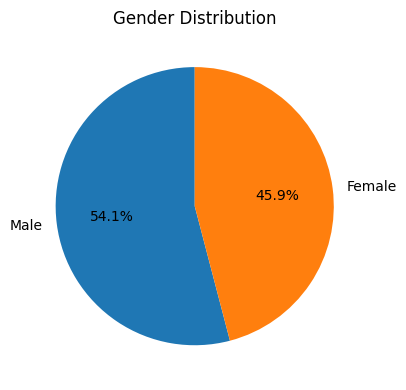

In [7]:
print("=> Pie Chart for Gender:")
plt.figure(figsize=(6, 4))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.tight_layout()
plt.savefig("Gender Pie Chart.png", bbox_inches='tight', dpi=300)
plt.show()

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 0.9em;">Visual Summary:</strong> 
  <span style="color: #000000; font-size: 0.9em;">The pie chart illustrates the gender distribution, showing the proportion of male and female customers.</span>
</div>

=> Countplot for Customer Response:


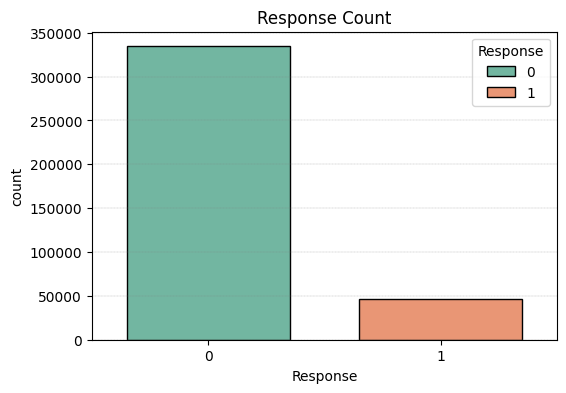

Response Rate (1/0): 
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


In [8]:
# Print Countplot for Visualization the Distribution of Customer Response

print("=> Countplot for Customer Response:")
plt.figure(figsize=(6,4))
sns.countplot(x="Response", hue="Response", palette='Set2', edgecolor="black", linewidth=1, data=df, width=0.7)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
plt.title("Response Count")
plt.savefig("Response count.png")
plt.show()

response_ratio = df['Response'].value_counts(normalize=True)# Count Value for Response...
print(f"Response Rate (1/0): \n{response_ratio}")# Show Response Ratio...

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 0.9em;">Visual Summary:</strong> 
  <span style="color: #000000; font-size: 0.9em;">The countplot displays the distribution of customer responses, indicating the number of customers who responded positively or negatively.</span>
</div>

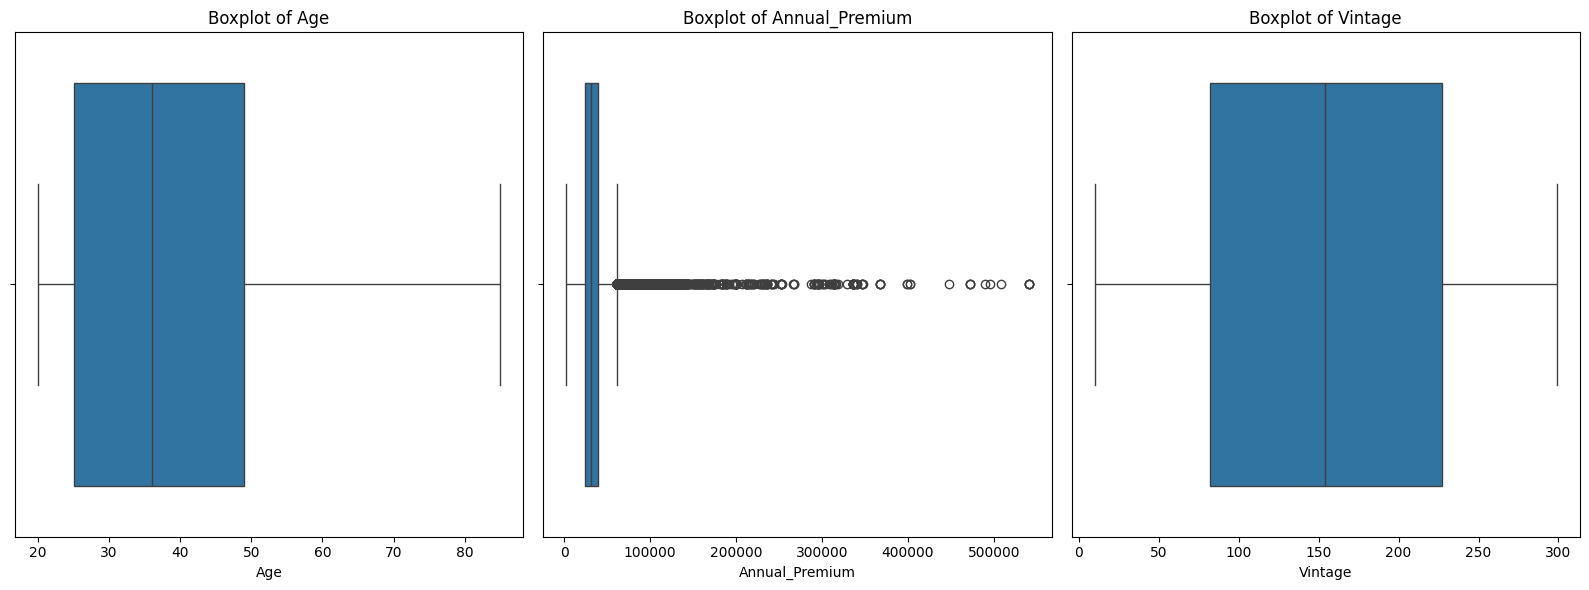

In [9]:
# Print Boxplot for Visualization the Distribution of Numerical Features

fig, axs = plt.subplots(1, len(numerical_features), figsize=(16, 6))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('Boxplots.png', bbox_inches='tight')
plt.show()

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 0.9em;">Visual Summary:</strong> 
  <span style="color: #000000; font-size: 0.9em;">The boxplots highlight the distribution and outliers of numerical features, providing insights into the spread and skewness of Age, Annual Premium, and Vintage.</span>
</div>

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The data visualization has been successfully generated, providing insights into the distribution of numerical features and the relationship between variables. The visualizations will help in identifying patterns and correlations in the data.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Data Preprocessing:</strong> 
</div>

In [10]:
# Convert categorical variables into numerical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

In [11]:
# Create Age_Group by Range and also Create Dummy Columns of Age_Group 
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 40, 60, 100], labels=['18-40', '40-60', '60+'])
df =pd.get_dummies(df, columns=['Age_Group'], prefix='Age_Group')

=> Heatmap:


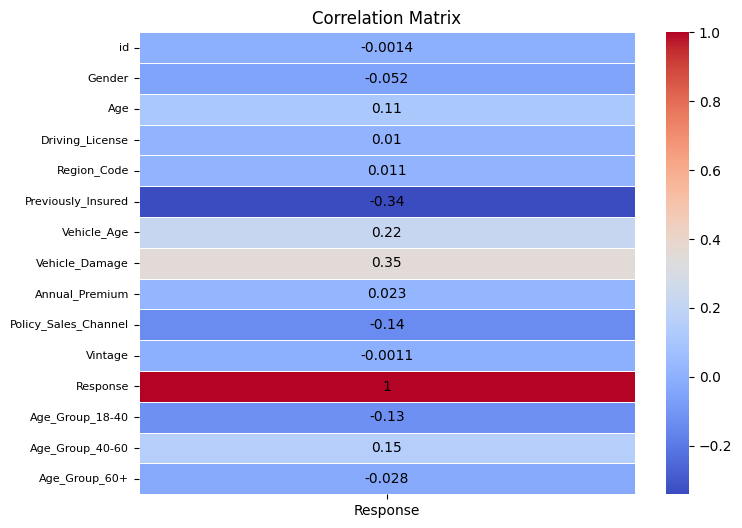

In [12]:
# Print Heatmap for Visualization the Correlation of Response Column with each Columns

print("=> Heatmap:")
plt.figure(figsize=(8,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[["Response"]], annot=True, cmap="coolwarm",
             linewidths=.5, annot_kws={"size": 10,"color":'black'})
plt.yticks(fontsize=8)
plt.title("Correlation Matrix")
plt.savefig("Correlation Matrix.png")
plt.show()

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 0.9em;">Visual Summary:</strong> 
  <span style="color: #000000; font-size: 0.9em;">The heatmap shows the correlation matrix, illustrating the strength and direction of the relationship between the response variable and other features.</span>
</div>

In [13]:
# Drop unnecessary columns
df = df.drop(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Vintage', 'Policy_Sales_Channel'], axis=1)
df.head()

,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Age_Group_18-40,Age_Group_40-60,Age_Group_60+
0,0,2,1,40454.0,1,False,True,False
1,0,1,0,33536.0,0,False,False,True
2,0,2,1,38294.0,1,False,True,False
3,1,0,0,28619.0,0,True,False,False
4,1,0,0,27496.0,0,True,False,False


In [14]:
# Split the dataset into feature and target variables
X = df.drop('Response', axis=1)
y = df['Response']

In [15]:
# Balance the data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Save the scaler to a file
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The data preprocessing has been successfully completed, including converting categorical variables into numerical variables and creating age groups. The data is now ready for modeling.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Model Selection and Hyperparameters:</strong> 
</div>

In [19]:
# Define the models
models = {
    'Decision_Tree_Classifier': DecisionTreeClassifier(random_state=42),
    'K_Neighbors_Classifier': KNeighborsClassifier(),
    'Random_Forest_Classifier': RandomForestClassifier(random_state=42),
    'Logistic_Regression': LogisticRegression(random_state=42),
}

In [20]:
# Define the hyperparameters for each model
param_dist = {
    'Decision_Tree_Classifier': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion':  ['gini', 'entropy']

    },
    'K_Neighbors_Classifier': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree'],
        'p': [1, 2]
    },
    'Random_Forest_Classifier': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion':  ['gini', 'entropy']

    },
    'Logistic_Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 500, 1000],
        'solver': ['liblinear', 'saga']

    }
}

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The code sets the stage for hyperparameter tuning of each model using a gridsearch or randomsearch approch. The goal is to find the optimal combination of hyperparameters that results in the best performance of the model on a given dataset.</span>
</div>

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Model Training, Evaluation and Save:</strong> 
</div>

In [21]:
# Model Evaluation Function

def model_evl(model_name, y_test, pred):
    acc = accuracy_score(y_test, pred)  # Overall correctness
    prc = precision_score(y_test, pred, zero_division=1)  # Correctness of positive predictions
    clf = classification_report(y_test, pred)  # Detailed report of prc, rec, f1 and support for each class
    conf = confusion_matrix(y_test, pred)  # Detailed breakdown of correct and incorrect predictions
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # Average error magnitude
   
    print(f"Model Evaluation for {model_name}:")
    print("Accuracy score =", (round(acc, 2) * 100), "%")  # Print Percentage of Accuracy Score
    print("Precision score =", (round(prc, 2) * 100), "%")  # Print Percentage of Precision Score
    print("Classification Report")
    print(clf)
    print("Confusion Matrix")
    print(conf)
    print("Root Mean Squared Error (RMSE) =", round(rmse, 2))
    print("Model successfully saved...")
    print("\n")

In [22]:
# Perform RandomizedSearchCV for each model and Get Evaluation

for model_name, model in models.items():
    params = param_dist.get(model_name)
    Randomized_search = RandomizedSearchCV(estimator=model, param_distributions=params,
                                            n_iter=20, scoring='accuracy', cv=3, n_jobs=-1)
    Randomized_search.fit(X_train_scaled, y_train)
    pred = Randomized_search.predict(X_test_scaled)
    joblib.dump(Randomized_search,f'{model_name}.joblib')
    model_evl(model_name, y_test, pred)

Model Evaluation for Decision_Tree_Classifier:
Accuracy score = 85.0 %
Precision score = 84.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     66775
           1       0.84      0.88      0.86     66985

    accuracy                           0.85    133760
   macro avg       0.86      0.85      0.85    133760
weighted avg       0.86      0.85      0.85    133760

Confusion Matrix
[[55211 11564]
 [ 7919 59066]]
Root Mean Squared Error (RMSE) = 0.38
Model successfully saved...


Model Evaluation for K_Neighbors_Classifier:
Accuracy score = 86.0 %
Precision score = 83.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     66775
           1       0.83      0.90      0.86     66985

    accuracy                           0.86    133760
   macro avg       0.86      0.86      0.86    133760
weighted avg       0.86      0.86      0.86    1337

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The models have been successfully trained and evaluated, with the Random Forest Classifier and KNN showing the best performance. The model evaluation metrics, including accuracy, precision, recall, and F1 score, have been calculated and reported.The trained model has been successfully saved to a file using joblib, and it can be loaded for future predictions without the need for retraining.

<div style="border: 3px solid #000000; padding: 15px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: 'Georgia', serif;">
  <strong style="color: #000000; font-size: 1.4em; font-family: 'Courier New', Courier, monospace;">>>> Cross-Validation Technique:</strong> 
</div>

In [24]:
# Check model performance by cross-validation technique
names_list = []
scores_list = []
for name, model in models.items():
    scoring_matric = 'accuracy'
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scoring_matric)
    names_list.append(name)
    scores_list.append(scores.mean())
    print(f"{name} : Mean = {scores.mean():.2f}, Std = {scores.std():.2f}")

#  Decision
#   => High Mean and Low Std is best model.
#   => Low Mean and Low Std is under performing model.
#   => High Std is Overfitting model.

Decision_Tree_Classifier : Mean = 0.85, Std = 0.00
K_Neighbors_Classifier : Mean = 0.83, Std = 0.01
Random_Forest_Classifier : Mean = 0.85, Std = 0.00
Logistic_Regression : Mean = 0.80, Std = 0.00


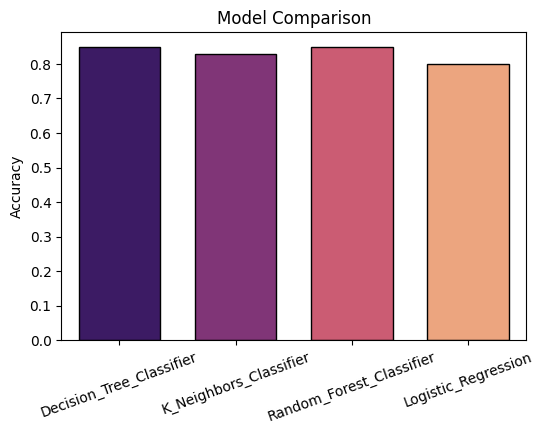

In [39]:
# Create a bar chart to compare the scores
plt.figure(figsize=(6,4))
sns.barplot(x=names_list, y=scores_list, hue=names_list, palette='magma',edgecolor="black", linewidth=1, width=0.7 )
plt.xticks(rotation = 20)
plt.ylabel(scoring_matric.capitalize())
plt.title('Model Comparison')
plt.savefig('Model Comparison.png')
plt.show()

<div style="border: 1px solid #000000; padding: 10px; border-radius: 5px; background-color: rgba(255, 255, 255, 0.7); font-family: Calibri, sans-serif;">
  <strong style="color: #000000; font-size: 1.1em;">Conclusion:</strong> 
  <span style="color: #000000; font-size: 1em;">The cross-validation technique has been successfully applied, providing insights into the model's performance on unseen data. The results show that the Random Forest Classifier has the highest mean accuracy and lowest standard deviation, So it is best performer.</span>
</div>